#                             Network Traffic Classification IN SDN

## Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,plot_confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1='/content/drive/MyDrive/Thesis/Day1.csv'
path2='/content/drive/MyDrive/Thesis/Day2.csv'
path3='/content/drive/MyDrive/Thesis/Day3.csv'

In [ ]:
df1=pd.read_csv(path1)
df2=pd.read_csv(path2)
df3=pd.read_csv(path2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,208,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,69,72,73,98,99,100,101,109,110,111,224,225,226,227,234,235,236,237,242,243,244,245,246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [ ]:
df.head()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,80,16945,0.000152,0.000683,0.002332,0.045501,0.006292,0.199639,0.007419,60,60.0,60.0,104.7,60.0,373,10660.455556,40,40.0,40.0,86.7,44.0,359,11064.900000,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.409508,0.0,0.0,0.0,3638.825833,2109.252458,2109.252458,0,0.010,0.454229,0.009087,0.773541,0.006690,0.971797,0.0037,1.09759,0.001229,0,0.005,0.454229,0.004471,0.773541,0.003092,0.971797,0.001434,1.09759,0.000665,0,0.005,1.487655,1.570266,0.773541,0.00365,0.971797,0.00243,1.09759,0.001423,WWW
1,80,16913,0.000161,0.000676,0.001589,0.045358,0.005105,0.199854,0.007504,60,60.0,60.0,104.8,60.0,373,10680.400000,40,40.0,40.0,86.8,44.0,359,11085.733333,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.408220,0.0,0.0,0.0,3655.092208,2115.848832,2115.848832,0,0.010,0.454229,0.009088,0.773541,0.006692,0.971797,0.003706,1.09759,0.001242,0,0.005,0.454229,0.004475,0.773541,0.003106,0.971797,0.001463,1.09759,0.000692,0,0.005,1.487655,1.570269,0.773541,0.003656,0.971797,0.002439,1.09759,0.001431,WWW
2,80,16917,0.000190,0.000322,0.001621,0.045383,0.005388,0.199375,0.007519,60,60.0,60.0,105.1,60.0,376,10860.100000,40,40.0,40.0,87.1,44.0,362,11268.100000,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.408444,0.0,0.0,0.0,3655.639713,2122.315466,2122.315466,0,0.008,0.454229,0.007464,0.773541,0.006050,0.971797,0.004255,1.09759,0.002703,0,0.004,0.454229,0.003626,0.773541,0.002645,0.971797,0.001422,1.09759,0.000418,0,0.005,1.487655,1.570266,0.773541,0.00365,0.971797,0.00243,1.09759,0.001422,WWW
3,80,17018,0.000156,0.000269,0.001586,0.045290,0.005118,0.199557,0.007501,60,60.0,60.0,104.9,60.0,373,10700.544444,40,40.0,40.0,86.9,44.0,359,11106.766667,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.407610,0.0,0.0,0.0,3659.513759,2115.580050,2115.580050,0,0.008,0.454229,0.007466,0.773541,0.006056,0.971797,0.004263,1.09759,0.002709,0,0.004,0.454229,0.003628,0.773541,0.002651,0.971797,0.001431,1.09759,0.000425,0,0.005,1.487655,1.570270,0.773541,0.003656,0.971797,0.00244,1.09759,0.001431,WWW
4,80,16926,0.000170,0.000312,0.002793,0.046520,0.010827,0.199397,0.007392,60,60.0,60.0,105.4,60.0,379,11041.600000,40,40.0,40.0,87.4,44.0,365,11452.266667,14,16.0,20.0,18.0,20.0,20,7.111111,5,5,4,5,2,1,0,0,0,0,...,0,0.0,0.418679,0.0,0.0,0.0,3490.627619,2032.341544,2032.341544,0,0.008,0.454229,0.007436,0.773541,0.005955,0.971797,0.004097,1.09759,0.002548,0,0.004,0.454229,0.003610,0.773541,0.002591,0.971797,0.001342,1.09759,0.00035,0,0.005,1.487655,1.570222,0.773541,0.003591,0.971797,0.002344,1.09759,0.001361,WWW


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72465 entries, 0 to 72464
Columns: 249 entries, 4 to 266
dtypes: float64(116), int64(100), object(33)
memory usage: 137.7+ MB


## Target Variable Info

In [ ]:
df['266'].value_counts()

WWW            55329
MAIL            9598
FTP-DATA        3833
DATABASE         896
FTP-PASV         731
SERVICES         646
P2P              527
MULTIMEDIA       387
FTP-CONTROL      349
ATTACK           160
INTERACTIVE        7
GAMES              2
Name: 266, dtype: int64

In [ ]:
df['266']=df['266'].astype('category')

## Target Encoding

In [ ]:
coded=df['266'].cat.codes
coded

0        11
1        11
2        11
3        11
4        11
         ..
72460     7
72461     7
72462    11
72463    11
72464    11
Length: 72465, dtype: int8

In [ ]:
unique_target=df['266'].unique()
unique_target

['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', 'ATTACK', ..., 'FTP-DATA', 'MULTIMEDIA', 'SERVICES', 'INTERACTIVE', 'GAMES']
Length: 12
Categories (12, object): ['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', ..., 'MULTIMEDIA',
                          'SERVICES', 'INTERACTIVE', 'GAMES']

In [ ]:
coded_maping=pd.DataFrame({'Category':unique_target,
                         'Code':coded.unique()})
coded_maping

,Category,Code
0,WWW,11
1,MAIL,7
2,FTP-CONTROL,2
3,FTP-PASV,4
4,ATTACK,0
5,P2P,9
6,DATABASE,1
7,FTP-DATA,3
8,MULTIMEDIA,8
9,SERVICES,10


## Remove Unknown Data Type

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('unknown')
    print(df[col])

0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    Y
72463    Y
72464    Y
Name: 77, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    N
72463    N
72464    N
Name: 78, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    Y
72463    Y
72464    Y
Name: 79, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    N
72463    N
72464    N
Name: 80, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    0
72463    0
72464    0
Name: 81, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3        ?
4        ?
        ..
72460    ?
72461    ?
72462    0
72463    0
72464    0
Name: 82, Length: 72465, dtype: object
0        ?
1        ?
2        ?
3      

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('unknown')
    df.drop([col],axis=1,inplace=True)

## Dataset Information After Redundant Feature


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72465 entries, 0 to 72464
Columns: 217 entries, 4 to 266
dtypes: category(1), float64(116), int64(100)
memory usage: 119.5 MB


In [ ]:
print(df.shape)

(72465, 217)


In [ ]:
df.describe()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,208,210,211,212,213,214,215,216,218,219,220,221,222,223,224,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,246,247,248,249,250,251,256,257,258,259
count,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.00000,72465.000000,72465.000000,72465.000000,...,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,7.246500e+04,7.246500e+04,7.246500e+04,72465.0,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.0,72465.000000,72465.000000,72465.000000,72465.000000,72465.000000,72465.0,72465.000000,72465.000000,72465.000000
mean,1463.872256,19482.506382,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,61.967060,64.847143,156.076195,251.447948,374.649017,704.060139,1.034204e+05,43.932699,46.914559,139.896902,235.418623,360.477375,690.055889,1.042632e+05,14.004250,14.171641,16.179293,16.029325,17.932585,18.034361,5.737571,77.560091,46.488498,76.638612,46.561416,7.934575,33.280204,0.07358,0.080425,0.005837,0.000262,...,4.512362,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,0.000799,0.001384,0.011778,0.277233,0.120429,3.630008,28.986283,0.493066,1.055071,5.773941,13.382817,4.007041,12.744684,4.495110e+04,7.368327e+03,7.368327e+03,0.0,0.056662,0.322361,0.054186,0.512936,0.049740,0.0,0.037159,0.331856,0.035488,0.525813,0.032578,0.0,0.027702,1.469579,1.567830
std,7733.015944,19291.498597,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,2.828267,38.893272,247.437497,194.079596,460.907610,423.885961,1.536972e+05,5.639518,39.480721,248.296660,194.018463,461.022079,423.892447,1.546791e+05,0.154006,0.535536,2.769544,1.562680,2.841208,2.816591,4.125414,1874.181300,968.970089,1874.189051,968.972394,160.891057,918.081210,0.62225,1.777030,0.081093,0.031301,...,4.235272,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,0.032326,0.035610,0.079027,1.779091,0.256553,20.243080,759.792598,1.527932,15.019408,27.865446,25.655496,23.439573,29.422449,1.241062e+05,3.343358e+04,3.343358e+04,0.0,0.154812,0.321004,0.150810,0.386151,0.143984,0.0,0.128636,0.324469,0.124882,0.390512,0.118077,0.0,0.095227,0.040419,0.038613
min,0.000000,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,0.000000e+00,28.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.000000e+00,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000477,0.000000,0.000954,0.000000,0.0,0.000000,0.000477,0.000000,0.000954,0.000000,0.0,0.000000,0.785398,0.785398
25%,80.000000,3025.000000,0.000001,0.000152,0.000326,0.034475,0.007509,0.148786,0.004338,60.000000,60.000000,60.000000,132.565217,73.500000,465.000000,2.039747e+04,40.000000,40.000000,40.000000,115.200000,59.000000,451.000000,2.070050e+04,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.000000,6.000000,5.000000,5.000000,5.000000,2.000000,2.000000,0.00000

In [ ]:
df.isna()

,4,8,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,...,210,211,212,213,214,215,216,218,219,220,221,222,223,224,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,246,247,248,249,250,251,256,257,258,259,266
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [ ]:
x=df.drop('266',axis=1)
y=df['266']

## Constant Feature Removal

In [ ]:
constant_feature=VarianceThreshold(threshold=0)
constant_feature.fit(x)

VarianceThreshold(threshold=0)

In [ ]:
print('Non-Constant Feature:',constant_feature.get_support().sum())

Non-Constant Feature: 205


In [ ]:
constant_list=[not temp for temp in constant_feature.get_support()]
print('Constant Feature List:',x.columns[constant_list])

Constant Feature List: Index(['87', '88', '89', '90', '115', '116', '117', '118', '236', '246',
       '256'],
      dtype='object')


In [ ]:
x_filter=constant_feature.transform(x)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
k_best=SelectKBest(score_func=f_classif,k=120)

In [ ]:
x_select=k_best.fit_transform(x_filter,y)

In [ ]:
score=pd.DataFrame(k_best.scores_,columns=['Score'])
columns_name=pd.DataFrame(x.columns,columns=['Feature Name'])
Feature=pd.concat([columns_name,score],axis=1)
Feature.nlargest(120,'Score')

,Feature Name,Score
0,4,8618.225702
64,87,6887.116414
128,158,5456.220476
135,166,5455.558465
68,91,5109.851408
...,...,...
177,210,267.793443
21,33,258.175054
14,26,258.126545
156,188,235.294143


## Split The Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_select,y,test_size=0.2)

In [ ]:
x_train.shape

(57972, 120)

In [ ]:
y_test.value_counts()

WWW            11099
MAIL            1955
FTP-DATA         697
DATABASE         203
FTP-PASV         153
SERVICES         111
P2P               99
MULTIMEDIA        78
FTP-CONTROL       64
ATTACK            33
GAMES              1
INTERACTIVE        0
Name: 266, dtype: int64

# Algorithms 

## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model=DecisionTreeClassifier()

In [ ]:
%%time
tree_model.fit(x_train,y_train)

CPU times: user 7.84 s, sys: 4 ms, total: 7.85 s
Wall time: 7.88 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DTpredicted=tree_model.predict(x_test)
DTpredicted

array(['MAIL', 'WWW', 'WWW', ..., 'SERVICES', 'WWW', 'WWW'], dtype=object)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':DTpredicted
})
predictions_comp

,True,Predicted
40779,MAIL,MAIL
58718,WWW,WWW
20975,WWW,WWW
32537,FTP-DATA,FTP-DATA
7065,WWW,WWW
...,...,...
20105,WWW,WWW
61855,WWW,WWW
34052,SERVICES,SERVICES
67949,WWW,WWW


In [ ]:
score=tree_model.score(x_test,y_test)
precent_score=score*100
print('Decision Tree Accuracy:%0.2f%%' %precent_score)

Decision Tree Accuracy:99.79%


In [ ]:
cm=confusion_matrix(DTpredicted,y_test)

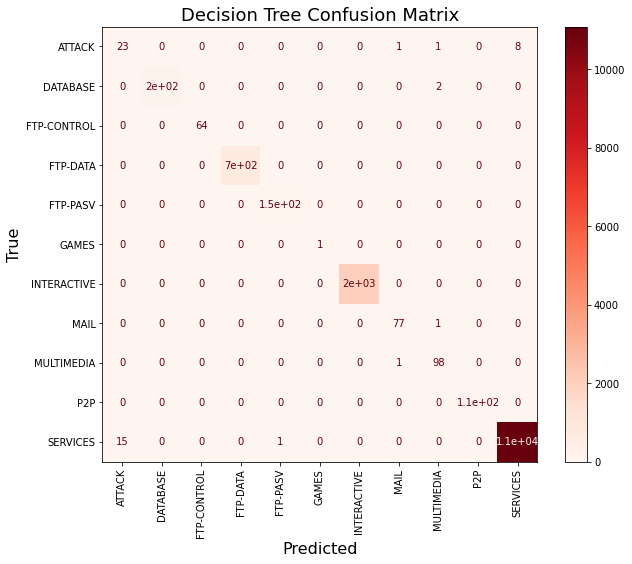

In [ ]:
dt_matrix=plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Reds)
dt_matrix.ax_.set_title('Decision Tree Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,DTpredicted))

              precision    recall  f1-score   support

      ATTACK       0.61      0.70      0.65        33
    DATABASE       1.00      0.99      1.00       203
 FTP-CONTROL       1.00      1.00      1.00        64
    FTP-DATA       1.00      1.00      1.00       697
    FTP-PASV       0.99      1.00      1.00       153
       GAMES       1.00      1.00      1.00         1
        MAIL       1.00      1.00      1.00      1955
  MULTIMEDIA       0.97      0.99      0.98        78
         P2P       0.96      0.99      0.98        99
    SERVICES       1.00      1.00      1.00       111
         WWW       1.00      1.00      1.00     11099

    accuracy                           1.00     14493
   macro avg       0.96      0.97      0.96     14493
weighted avg       1.00      1.00      1.00     14493



## Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model=RandomForestClassifier()

In [ ]:
%%time
random_forest_model.fit(x_train,y_train)

CPU times: user 37.1 s, sys: 10.8 ms, total: 37.1 s
Wall time: 37.2 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RFpredicted=random_forest_model.predict(x_test)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':RFpredicted
})
predictions_comp

,True,Predicted
40779,MAIL,MAIL
58718,WWW,WWW
20975,WWW,WWW
32537,FTP-DATA,FTP-DATA
7065,WWW,WWW
...,...,...
20105,WWW,WWW
61855,WWW,WWW
34052,SERVICES,SERVICES
67949,WWW,WWW


In [ ]:
score=random_forest_model.score(x_test,y_test)
precent_score=score*100
print('Random Forest Accuracy:%0.2f%%' %precent_score)

Random Forest Accuracy:99.89%


In [ ]:
cm=confusion_matrix(y_test,RFpredicted)

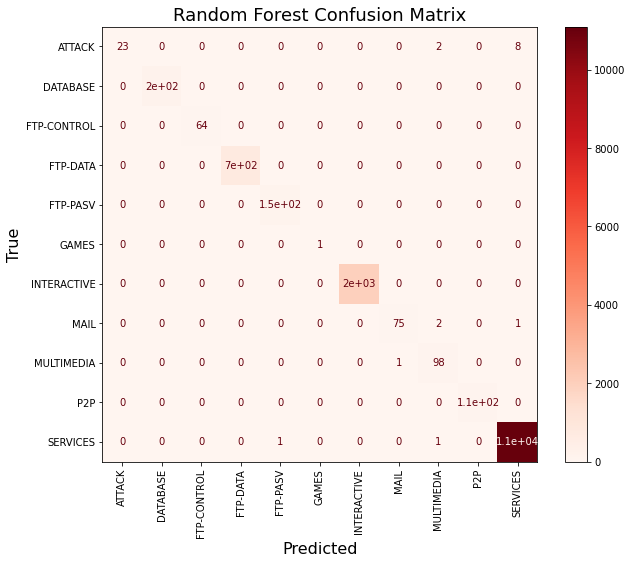

In [ ]:
rf_matrix=plot_confusion_matrix(random_forest_model,x_test,y_test,cmap=plt.cm.Reds)
rf_matrix.ax_.set_title('Random Forest Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,RFpredicted))

              precision    recall  f1-score   support

      ATTACK       1.00      0.70      0.82        33
    DATABASE       1.00      1.00      1.00       203
 FTP-CONTROL       1.00      1.00      1.00        64
    FTP-DATA       1.00      1.00      1.00       697
    FTP-PASV       0.99      1.00      1.00       153
       GAMES       1.00      1.00      1.00         1
        MAIL       1.00      1.00      1.00      1955
  MULTIMEDIA       0.99      0.96      0.97        78
         P2P       0.95      0.99      0.97        99
    SERVICES       1.00      1.00      1.00       111
         WWW       1.00      1.00      1.00     11099

    accuracy                           1.00     14493
   macro avg       0.99      0.97      0.98     14493
weighted avg       1.00      1.00      1.00     14493



## SVM Algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()

In [ ]:
%%time
svm_model.fit(x_train,y_train)

CPU times: user 3min 2s, sys: 81.8 ms, total: 3min 2s
Wall time: 3min 3s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVMpredicted=svm_model.predict(x_test)

In [ ]:
predictions_comp=pd.DataFrame({
    'True':y_test,
    'Predicted':SVMpredicted
})
predictions_comp

,True,Predicted
40779,MAIL,MAIL
58718,WWW,WWW
20975,WWW,WWW
32537,FTP-DATA,FTP-DATA
7065,WWW,WWW
...,...,...
20105,WWW,WWW
61855,WWW,WWW
34052,SERVICES,MAIL
67949,WWW,WWW


In [ ]:
score=svm_model.score(x_test,y_test)
precent_score=score*100
print('SVM Accuracy Score: %.3f %% ' %precent_score)

SVM Accuracy Score: 94.287 % 


In [ ]:
cm=confusion_matrix(y_test,SVMpredicted)

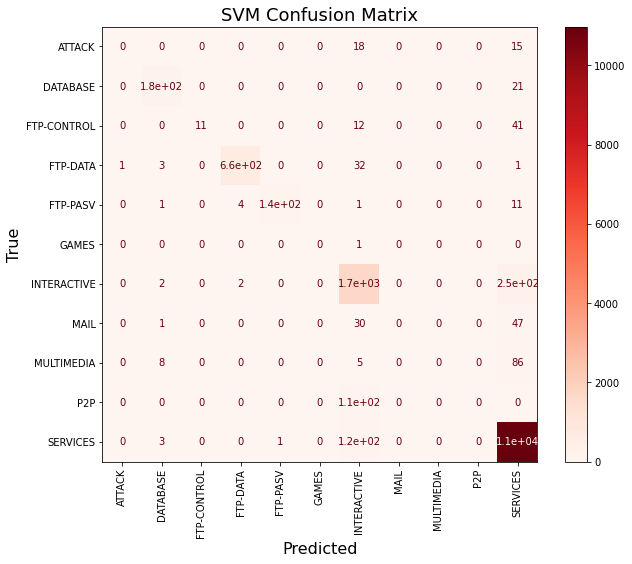

In [ ]:
svm_matrix=plot_confusion_matrix(svm_model,x_test,y_test,cmap=plt.cm.Reds)
svm_matrix.ax_.set_title('SVM Confusion Matrix',fontsize=18)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('True',fontsize=16)
plt.gcf().set_size_inches(10,8)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test,SVMpredicted))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      ATTACK       0.00      0.00      0.00        25
    DATABASE       0.89      0.88      0.89       155
 FTP-CONTROL       0.62      0.08      0.14        62
    FTP-DATA       0.99      0.95      0.97       767
    FTP-PASV       1.00      0.90      0.95       154
 INTERACTIVE       0.00      0.00      0.00         3
        MAIL       0.82      0.86      0.84      1914
  MULTIMEDIA       0.00      0.00      0.00        71
         P2P       0.00      0.00      0.00        87
    SERVICES       0.00      0.00      0.00       136
         WWW       0.96      0.99      0.97     11119

    accuracy                           0.94     14493
   macro avg       0.48      0.42      0.43     14493
weighted avg       0.92      0.94      0.93     14493

